In [1]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
wine = pd.read_csv('https://s3.us-east-1.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/1613254703__modified_wine.csv')
df = wine[['malic_acid', 'flavanoids']]
df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


We are not going to use a target/y-vector in this dataset. We are interested in finding the clusters of wine using th malic_acid and flacanoids features.

The first step when doing KMeans clustering is to scale our data.

Thinking about how the KMeans algorithm works... Why do you think scaling would be important?

In [5]:
# Instatntiate Standard Scaler
scaler = StandardScaler()
# fit & transform data.
scaled_df = scaler.fit_transform(df)

# KMeans

One of the drawbacks of the KMeans algorithm is that there is no clear way to determine how many clusters to use. In the graph below, we can visually check how many clusters we think we should have since our data is only 2-dimensional.

**Note:** KMeans can fit on any number of columns!

In this example we are only fitting on two columns for the purpose of plotting, however, realistically, most of the data we work with will be multi-dimensional. If possible, we can use domain knowledge or work with a subject matter expert to determine which features we should include and howmany cluster are reasonable. We can also use scores such as the Silhouette Score to determine how well-defined our clusters are -- more on this later.

Text(0, 0.5, 'Flavanoids')

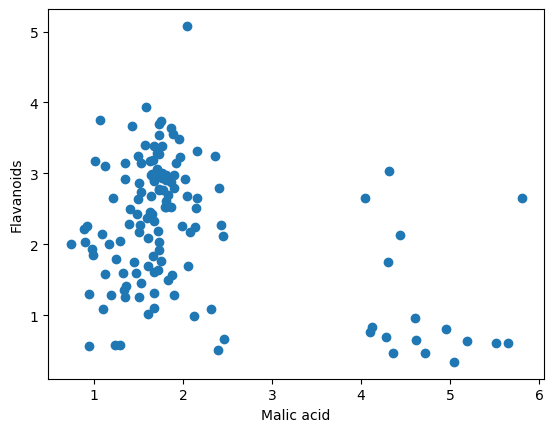

In [6]:
# Visualize data
plt.scatter(df['malic_acid'], df['flavanoids'])
plt.xlabel('Malic acid')
plt.ylabel('Flavanoids')

How many clusters do you think we likely hace based on the graph above?

In [7]:
# Instantiate KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df)

KMeans(n_clusters=2)

C:\Users\zachd\AppData\Local\Temp\ipykernel_25408\1116161261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


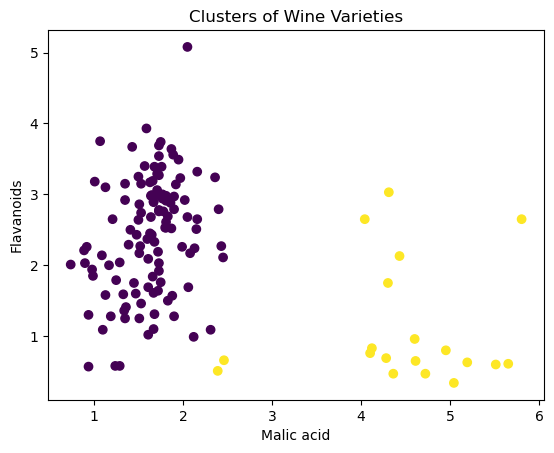

In [8]:
# Save the cluster labels to the dataframe
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df['malic_acid'], df['flavanoids'], c= df['cluster'])
plt.xlabel('Malic acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');

Nice! We've just used the KMeans algorithm to cluster our data into two different groups of wine! Something important to note is that you may occasionally get data points in unexpected clusters (like the two yellow points in the graph above that appear to fit better in the purple cluster). This can happen because of the random initialization of the centroids in the algorith!